# 24. Database 와 SQL(Structured Query Language, 구조화 질의어) 사용하기

- ``emailbox-short.txt`` FILE 을 이용하여 sqlite db 생성  


- basic ``CRUD`` (Create, Retrieve, Update, Delete) operation 을 Python 과 SQL 을 이용하여 수행

<p style="text-align: center;">Relational Database 구조 (schema)</p>

<img src="https://objectivity.com/wp-content/uploads/schema1.png" width="600"/>

## 기본 SQL 문법

### 테이블 생성 (CREATE)

- CREATE TABLE 테이블명 (필드명 자료형, ...)

### 데이터조회하기 (SELECT)

- SELECT * FROM 테이블명
- SELECT 열명1, 열명2 FROM 테이블명

### 테이블 구조 참조하기 (DESC)

- DESC 테이블명

### 검색 조건 지정하기 (WHERE)

- SELECT 열1, 열2 FROM 테이블명 WHERE 조건식

### 레코드 추가(INSERT)

- INSERT INTO 테이블명(필드명, ...)  VALUES (값, ...)

### 레코드 삭제(DELETE)

- DELETE FROM 테이블명 WHERE 조건

### 데이터 변경(UPDATE)

- UPDATE 테이블명 SET (필드명=값, ...) WHERE 조건

## db 연결 및 cursor 생성

### connection methods

- connect( ) 를 이용하여 SQLite database 와의 connection object 생성


- cursor( ) - 이 connection 을 이용한 cursor object 를 반환. cursor 는 수행할 SQL 문의 단위가 된다.


- commit( ) - database 에 transaction 반영 


- rollback( ) - transaction 의 starting point 로 되돌아감 


- close( ) - database 와의 연결을 종료

### cursor methods

- execute( ) - string 으로 sql 문장 수행 


- executemany( ) - tuple 의 list 로 여러개 sql 일괄 수행


- fetchone( ) - query result set 에서 다음 row 를 fetch  


- fetchall( ) - query result set 의 나머지 row 를 모두 fetch  

In [1]:
import sqlite3
con = sqlite3.connect('emaildb.sqlite')
cur = con.cursor()

### Table 생성

| column | type | 
|:---:|:---:|
| email | TEXT | 
| count  | INTEGER |  

In [2]:
try:        
    cur.execute("DROP TABLE IF EXISTS Counts")
    cur.execute("CREATE TABLE Counts (email TEXT, count INTEGER)")
    print ('table created successfully')
except Exception as e:
    print ('error in operation, ', e)
    con.rollback()
    con.close()

table created successfully


- `From: ` 으로 시작하는 record 에서 email id 를 추출하여 db 에 건수 누적 

- SQL 문에서 `?` 는 placeholder 를 의미. 여러개가 올 수 있으므로 tuple 로 mapping 시킨다

In [4]:
fname = 'emailbox-short.txt'
fh = open(fname)

for line in fh:
    if not line.startswith('From: '):
        continue
    pieces = line.split()
    email = pieces[1]
    cur.execute('SELECT count FROM Counts WHERE email = ?', (email,))
    row = cur.fetchone()
    if row is None:
        cur.execute('INSERT INTO Counts (email, count) VALUES (?, 1)', 
                        (email,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?', 
                        (email,))
        
    con.commit()

### 입력된 data 확인

In [5]:
sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(row[0], row[1])

cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1


In [6]:
cur.execute('SELECT email, count FROM Counts')
cur.fetchall()

[('stephen.marquard@uct.ac.za', 2),
 ('louis@media.berkeley.edu', 3),
 ('zqian@umich.edu', 4),
 ('rjlowe@iupui.edu', 2),
 ('cwen@iupui.edu', 5),
 ('gsilver@umich.edu', 3),
 ('wagnermr@iupui.edu', 1),
 ('antranig@caret.cam.ac.uk', 1),
 ('gopal.ramasammycook@gmail.com', 1),
 ('david.horwitz@uct.ac.za', 4),
 ('ray@media.berkeley.edu', 1)]

In [7]:
cur.execute('SELECT email, count FROM Counts')
cur.fetchone()

('stephen.marquard@uct.ac.za', 2)

In [8]:
cur.fetchone()

('louis@media.berkeley.edu', 3)

In [9]:
cur.fetchone()

('zqian@umich.edu', 4)

In [10]:
cur.fetchall()

[('rjlowe@iupui.edu', 2),
 ('cwen@iupui.edu', 5),
 ('gsilver@umich.edu', 3),
 ('wagnermr@iupui.edu', 1),
 ('antranig@caret.cam.ac.uk', 1),
 ('gopal.ramasammycook@gmail.com', 1),
 ('david.horwitz@uct.ac.za', 4),
 ('ray@media.berkeley.edu', 1)]

In [11]:
sql = 'INSERT INTO Counts (email, count) VALUES (?, ?);'

In [12]:
emails=[('test1@test.com', 100), 
             ('test2@test.com', 200), 
             ('test3@test.com', 300)]

cur.executemany(sql, emails)

In [13]:
cur.execute('SELECT email, count FROM Counts')
cur.fetchall()

[('stephen.marquard@uct.ac.za', 2),
 ('louis@media.berkeley.edu', 3),
 ('zqian@umich.edu', 4),
 ('rjlowe@iupui.edu', 2),
 ('cwen@iupui.edu', 5),
 ('gsilver@umich.edu', 3),
 ('wagnermr@iupui.edu', 1),
 ('antranig@caret.cam.ac.uk', 1),
 ('gopal.ramasammycook@gmail.com', 1),
 ('david.horwitz@uct.ac.za', 4),
 ('ray@media.berkeley.edu', 1),
 ('test1@test.com', 100),
 ('test2@test.com', 200),
 ('test3@test.com', 300)]

## 연습문제

- 다음 table 을 database 로 생성  

- executemany( ) 를 이용하여 A1~A3 까지의 data 를 일괄 insert

- 전체를 조회  

- A4 를 추가로 insert  

- A3 의 나이를 59 로 변경  

- A1 을 삭제  

- 전체를 조회


|학생번호| 성명 |나이 |성적|
|:------:|:-----:|---|----|
|A1|홍길동|20|70|
|A2|유병길|16|80|
|A3|김길수|29|90|
|A4|박재만|25|86|

<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 25. Graph Data Structure

### 그래프는 노드(node)와 그 노드를 연결하는 간선(edge)을 하나로 모아 놓은 자료 구조를 말한다.

### 노드 (Node)

정점(vertex)라고도 부르며 위치를 나타낸다.

### Edge (간선)

위치간의 연결선을 나타낸다. 일방향 혹은 양방향일 수 있다. 

###  가중치 (weight)

두 node 사이를 이동하는 비용 (cost) 를 의미한다. 예를 들어 두개의 도시(node) 를 연결하는 길의 가중치는 두 도시 사이의 거리이다.

### 그래프 (Graph)

그래프는 $G=(V,E)$ 로 표시할 수 있고, 각 edge 는 연결되는 node 와 weight 의 tuple 로 표시한다  $(node1, node2, weight)$.

<img src="graph_diagram.png" width="300">


6 개의 node 와 9 개의 edge 로 구성된 위 그래프는 다음과 같이 node 와 edge 의 집합(set) 으로 표시한다.

$$V=\{a,b,c,d,e,f\}$$

$$E=\{(a,b,7),(a,c,9),(a,f,14),(b,d,15),(b,c,10),(c,d,11),(c,f,2),(d,e,6),(e,f,9)\}$$

### 경로 (Path)

경로는 node 를 통과하는 순서이다. 경로의 길이는 node 사이 edge 의 weight 를 모두 합한 것이다.
예를 들어 경로 $(a, c, d, e)$ 의 edge 는 $\{(a, c, 9), (c, d, 11), (d, e, 6)\}$ 이 되고 경로의 길이는 26 이다.


### Python class 를 이용한 Graph 구조 구현

In [1]:
# __iter__ : iterable object 반환

class Atest:
    def __init__(self, values=None):
        if values is None:
            self.values = []
        else:
            self.values = values
            
    def __iter__(self):
        return iter(self.values)
    
a = Atest([1,3,5,7])

for n in a:
    print(n)

1
3
5
7


In [2]:
class Graph:
    def __init__(self):
        self.adjacentList = {}  # 인접한 이웃 node list
    
    # 인접한 이웃 node list iterable object 반환
    def __iter__(self):
        return iter(self.adjacentList.items())     
        
    # 그래프에 새로운 node 추가
    def add_vertex(self, vertex):                    
        if not vertex in self.adjacentList:          
            self.adjacentList[vertex] = []  # 새로이 추가된 node 에는 아직 edge 가 없음

    # 새로운 edge 등록 (이웃 node 와 가중치)
    def add_edge(self, v1, v2, weight):           
        self.adjacentList[v1].append({'node': v2, 'weight': weight})
        self.adjacentList[v2].append({'node': v1, 'weight': weight})

In [3]:
g = Graph()

g.add_vertex('a')
g.add_vertex('b')
g.add_vertex('c')
g.add_vertex('d')
g.add_vertex('e')
g.add_vertex('f')

g.add_edge('a','b',7)
g.add_edge('a','c',9)
g.add_edge('a','f',14)
g.add_edge('b','c',10)
g.add_edge('b','d',15)
g.add_edge('c','d',11)
g.add_edge('c','f',2)
g.add_edge('d','e',6)
g.add_edge('e','f',9)

for node in g:
    print(node)

('a', [{'node': 'b', 'weight': 7}, {'node': 'c', 'weight': 9}, {'node': 'f', 'weight': 14}])
('b', [{'node': 'a', 'weight': 7}, {'node': 'c', 'weight': 10}, {'node': 'd', 'weight': 15}])
('c', [{'node': 'a', 'weight': 9}, {'node': 'b', 'weight': 10}, {'node': 'd', 'weight': 11}, {'node': 'f', 'weight': 2}])
('d', [{'node': 'b', 'weight': 15}, {'node': 'c', 'weight': 11}, {'node': 'e', 'weight': 6}])
('e', [{'node': 'd', 'weight': 6}, {'node': 'f', 'weight': 9}])
('f', [{'node': 'a', 'weight': 14}, {'node': 'c', 'weight': 2}, {'node': 'e', 'weight': 9}])


## 연습문제

- 위에서 작성한 Graph g 에서 세개의 node 를 연결 (두개의 구간 연결)하는 거리를 계산하는 함수를 작성하세요

In [4]:
g.adjacentList

{'a': [{'node': 'b', 'weight': 7},
  {'node': 'c', 'weight': 9},
  {'node': 'f', 'weight': 14}],
 'b': [{'node': 'a', 'weight': 7},
  {'node': 'c', 'weight': 10},
  {'node': 'd', 'weight': 15}],
 'c': [{'node': 'a', 'weight': 9},
  {'node': 'b', 'weight': 10},
  {'node': 'd', 'weight': 11},
  {'node': 'f', 'weight': 2}],
 'd': [{'node': 'b', 'weight': 15},
  {'node': 'c', 'weight': 11},
  {'node': 'e', 'weight': 6}],
 'e': [{'node': 'd', 'weight': 6}, {'node': 'f', 'weight': 9}],
 'f': [{'node': 'a', 'weight': 14},
  {'node': 'c', 'weight': 2},
  {'node': 'e', 'weight': 9}]}

In [ ]:
def connect(a, b, c):
    
    def dist(x, y):
        for n in g.adjacentList[x]:
            
            # CODE HERE
    
    return dist(a, b) + dist(b, c)

In [ ]:
connect('a', 'b', 'c')

<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 27. Pandas Basic

## Pandas 는 Series data type 과 DataFrame data type 으로 구성된다.

### Series (1 차원) : numpy array 와 유사. 
- 차이점 - numpy 와 달리 Series 는 axis (행, 열)에 label 을 부여할 수 있다. 즉, numpy 와 같이 숫자로만 indexing 하는 것이 아니라 label 명으로 indexing 을 할 수 있다. 또한 숫자 뿐 아니라 임의의 Python object 를 모두 element 로 가질 수 있다.


### DataFrame (2차원, table)
- Python program 안의 Excel

### Series vs DataFrame
<img src="series-and-dataframe.width-1200.png" width="400">


<img src="base_01_pandas_5_0.png" width="400">

In [1]:
import pandas as pd
import numpy as np

## DataFrame 만들기

DataFrame 은 여러개의 Series 를 같은 index 기준으로 모아 Table 을 만든 것이다.

### List  이용

In [2]:
np.random.seed(101)
data = np.random.randn(5, 4)

In [3]:
df = pd.DataFrame(data, index=['A', 'B', 'C', 'D', 'E'], columns=['W', 'X', 'Y', 'Z'])
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### Dictionary 이용

In [4]:
songs = {"book": ["춘향전", "무기여 잘있거라", "소나기", "해리포터", "왕좌의 게임", "알고리즘파이썬"],
               "year": [1600, 1930, 1940, 1990, 2000, 2010],
               "pages": [50, 100, 100, 1000, 2000, 300]}

songs_df = pd.DataFrame(songs)
songs_df

,book,year,pages
0,춘향전,1600,50
1,무기여 잘있거라,1930,100
2,소나기,1940,100
3,해리포터,1990,1000
4,왕좌의 게임,2000,2000
5,알고리즘파이썬,2010,300


- page 가 많은 순서로 sort

In [5]:
songs_df.sort_values('pages', ascending=False, inplace=True)
songs_df

,book,year,pages
4,왕좌의 게임,2000,2000
3,해리포터,1990,1000
5,알고리즘파이썬,2010,300
1,무기여 잘있거라,1930,100
2,소나기,1940,100
0,춘향전,1600,50


### DataFrame indexing

- single column

In [6]:
songs_df['pages']

4    2000
3    1000
5     300
1     100
2     100
0      50
Name: pages, dtype: int64

In [7]:
type(songs_df['pages'])

pandas.core.series.Series

- multiple columns

In [8]:
y = songs_df[['book', 'year']]
y

,book,year
4,왕좌의 게임,2000
3,해리포터,1990
5,알고리즘파이썬,2010
1,무기여 잘있거라,1930
2,소나기,1940
0,춘향전,1600


## slicing of DataFrame

In [9]:
df[:3]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001


In [10]:
df['A':'B']

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965


### loc

In [11]:
df.loc['B':'C', ['W', 'X']]

,W,X
B,0.651118,-0.319318
C,-2.018168,0.740122


### iloc

In [12]:
df.iloc[1:3, 0:2]

,W,X
B,0.651118,-0.319318
C,-2.018168,0.740122


In [13]:
df.iloc[1:3, :]

,W,X,Y,Z
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001


In [14]:
df.iloc[1,1]

-0.31931804459303326

### 조건에 따른 slicing

In [15]:
df[df['W'] > 0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [16]:
df[(df['W'] > 0) | (df['Y'] > 0)]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


### index values

In [17]:
df.index.values

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

### dataframe 의 column 명

In [18]:
df.columns

Index(['W', 'X', 'Y', 'Z'], dtype='object')

### column 별 unique value 의 갯수

In [19]:
df.nunique()

W    5
X    5
Y    5
Z    5
dtype: int64

In [20]:
df['W'].unique()

array([ 2.70684984,  0.65111795, -2.01816824,  0.18869531,  0.19079432])

In [21]:
df['W'].value_counts()

 2.706850    1
 0.651118    1
-2.018168    1
 0.188695    1
 0.190794    1
Name: W, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       5 non-null      float64
 1   X       5 non-null      float64
 2   Y       5 non-null      float64
 3   Z       5 non-null      float64
dtypes: float64(4)
memory usage: 372.0+ bytes


In [23]:
df.describe()

,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000
mean,0.343858,0.453764,0.452287,0.431871
std,1.681131,1.061385,1.454516,0.594708
min,-2.018168,-0.758872,-0.933237,-0.589001
25%,0.188695,-0.319318,-0.848077,0.503826
50%,0.190794,0.628133,0.528813,0.605965
75%,0.651118,0.740122,0.907969,0.683509
max,2.706850,1.978757,2.605967,0.955057


### new column 추가/삭제

In [24]:
df['new'] = df['W'] + df['X']
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.334983
B,0.651118,-0.319318,-0.848077,0.605965,0.331800
C,-2.018168,0.740122,0.528813,-0.589001,-1.278046
D,0.188695,-0.758872,-0.933237,0.955057,-0.570177
E,0.190794,1.978757,2.605967,0.683509,2.169552


In [25]:
df.drop('new', axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [26]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.334983
B,0.651118,-0.319318,-0.848077,0.605965,0.331800
C,-2.018168,0.740122,0.528813,-0.589001,-1.278046
D,0.188695,-0.758872,-0.933237,0.955057,-0.570177
E,0.190794,1.978757,2.605967,0.683509,2.169552


In [27]:
df.drop('new', axis=1, inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [28]:
df.drop('D', axis=0, inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
E,0.190794,1.978757,2.605967,0.683509


In [29]:
df.shape

(4, 4)

In [30]:
df.loc['A':'B', ['Y']] = np.nan
df

,W,X,Y,Z
A,2.706850,0.628133,NaN,0.503826
B,0.651118,-0.319318,NaN,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
E,0.190794,1.978757,2.605967,0.683509


### missing value 를 포함하고 있는 모든 row 삭제 - default

In [31]:
df.dropna()

,W,X,Y,Z
C,-2.018168,0.740122,0.528813,-0.589001
E,0.190794,1.978757,2.605967,0.683509


### missing value 를 포함하고 있는 모든 column 삭제

In [32]:
df.dropna(axis=1)

,W,X,Z
A,2.706850,0.628133,0.503826
B,0.651118,-0.319318,0.605965
C,-2.018168,0.740122,-0.589001
E,0.190794,1.978757,0.683509


### missing value 대체

In [33]:
df.fillna(value=0)

,W,X,Y,Z
A,2.706850,0.628133,0.000000,0.503826
B,0.651118,-0.319318,0.000000,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
E,0.190794,1.978757,2.605967,0.683509


In [34]:
df.fillna(value=df['Y'].mean())

,W,X,Y,Z
A,2.706850,0.628133,1.567390,0.503826
B,0.651118,-0.319318,1.567390,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
E,0.190794,1.978757,2.605967,0.683509


### csv file read

In [36]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### DataFrame 을 csv file 로 write

In [37]:
df2 = df.loc[:, ['quality', 'alcohol', 'pH']]
df2.to_csv('winequality-2.csv')

In [38]:
pd.read_csv('winequality-2.csv', index_col=0).head()

,quality,alcohol,pH
0,5,9.4,3.51
1,5,9.8,3.20
2,5,9.8,3.26
3,6,9.8,3.16
4,5,9.4,3.51


### df.apply + lambda

In [40]:
df["New_val"] = df.apply(lambda x :  x["fixed acidity"] + x["citric acid"] , axis = 1 )
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,New_val
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,7.40
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,7.80
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,7.84
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,11.76
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,6.28
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6.00
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,6.43
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,6.02


### lambda 보다 더 복잡한 함수 적용

In [41]:
def custom(alcohol , ph) :
    if alcohol < 10 :
        return ph * 1.5
    else :
        return ph * -1

df["New_pH"] = df.apply(lambda x : custom(x["alcohol"], x["pH"]) , axis = 1 )
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,New_val,New_pH
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,7.40,5.265
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,7.80,4.800
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,7.84,4.890
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,11.76,4.740
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,7.40,5.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,6.28,-3.450
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6.00,-3.520
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,6.43,-3.420
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,6.02,-3.570


In [42]:
import sqlite3
con = sqlite3.connect('emaildb.sqlite')
cur = con.cursor()

In [43]:
df = pd.read_sql('select * from Counts', con=con)
df

,email,count
0,stephen.marquard@uct.ac.za,2
1,louis@media.berkeley.edu,3
2,zqian@umich.edu,4
3,rjlowe@iupui.edu,2
4,cwen@iupui.edu,5
5,gsilver@umich.edu,3
6,wagnermr@iupui.edu,1
7,antranig@caret.cam.ac.uk,1
8,gopal.ramasammycook@gmail.com,1
9,david.horwitz@uct.ac.za,4


In [44]:
df = pd.read_sql('SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10', con=con)
df

,email,count
0,cwen@iupui.edu,5
1,zqian@umich.edu,4
2,david.horwitz@uct.ac.za,4
3,louis@media.berkeley.edu,3
4,gsilver@umich.edu,3
5,stephen.marquard@uct.ac.za,2
6,rjlowe@iupui.edu,2
7,wagnermr@iupui.edu,1
8,antranig@caret.cam.ac.uk,1
9,gopal.ramasammycook@gmail.com,1


## Merging DataFrame

In [45]:
df = pd.DataFrame([{"name": "Chris", "Item Purchased": "Sponge", "Cost": 22.50},
                               {"name": "Kevin", "Item Purchased": "Kettle", "Cost": 2.50},
                               {"name": "Filip", "Item Purchased": "Spoon", "Cost": 5.00}],
                             index=['Store 1', 'Store 1', 'Store 2'])
df

,name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevin,Kettle,2.5
Store 2,Filip,Spoon,5.0


- 새로운 column 추가

In [46]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevin,Kettle,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


- broadcasting

In [47]:
df['Delivered'] = True
df

,name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevin,Kettle,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


- missing value 추가

In [48]:
df['Feedback'] = ['Positive', None, 'Negarive']
df

,name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevin,Kettle,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negarive


- reset index

In [49]:
adf = df.reset_index()
adf

,index,name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevin,Kettle,2.5,January 1,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negarive


- 특정 row 전체의 data update $\rightarrow$ 지정 안된 row  는 missing value 처리

In [50]:
adf['Date'] = pd.Series({0: 'December 10', 2: 'mid-June'})
adf

,index,name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 10,True,Positive
1,Store 1,Kevin,Kettle,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-June,True,Negarive


## DataFrame 간의 Join

<img src="venDiagram.png" width=400>
<p> Inner Join (Intersection) </p>
<img src="innerJoin.png" width=300>

In [51]:
staff_df = pd.DataFrame([{"Name": 'Kelly', "Role": 'HR Director'},
                        {"Name": "Sally", "Role": 'Coordinator'},
                        {"Name": "James", "Role": "Grader"}])
staff_df = staff_df.set_index("Name")

staff_df

,Role
Name,
Kelly,HR Director
Sally,Coordinator
James,Grader


In [52]:
student_df = pd.DataFrame([{"Name": 'James', "Major": 'Business'},
                            {"Name": "Sally", "Major": 'AI'},
                            {"Name": "Mike", "Major": "Engineering"}])
student_df = student_df.set_index("Name")
student_df

,Major
Name,
James,Business
Sally,AI
Mike,Engineering


### outer join

In [53]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,Major
Name,,
James,Grader,Business
Kelly,HR Director,NaN
Mike,NaN,Engineering
Sally,Coordinator,AI


### inner join (default)

In [54]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,Major
Name,,
Sally,Coordinator,AI
James,Grader,Business


### left join 

In [55]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,Major
Name,,
Kelly,HR Director,NaN
Sally,Coordinator,AI
James,Grader,Business


### right join

In [56]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,Major
Name,,
James,Grader,Business
Sally,Coordinator,AI
Mike,NaN,Engineering


### index 가 단순 sequence 일 경우 join 할 column 지정

In [57]:
staff_df = staff_df.reset_index()
staff_df

,Name,Role
0,Kelly,HR Director
1,Sally,Coordinator
2,James,Grader


In [58]:
student_df = student_df.reset_index()
student_df

,Name,Major
0,James,Business
1,Sally,AI
2,Mike,Engineering


In [59]:
pd.merge(staff_df, student_df, left_on='Name', right_on='Name')

,Name,Role,Major
0,Sally,Coordinator,AI
1,James,Grader,Business


### 중복된 column 명이 있을 경우 자동으로 suffix 부여

In [60]:
staff_df['Location'] = ['Korea', 'China', 'Europe']
staff_df

,Name,Role,Location
0,Kelly,HR Director,Korea
1,Sally,Coordinator,China
2,James,Grader,Europe


In [61]:
student_df['Location'] = ['Seoul', 'Pusan', 'Jeju']
student_df

,Name,Major,Location
0,James,Business,Seoul
1,Sally,AI,Pusan
2,Mike,Engineering,Jeju


- left : `_x`, right: `_y`

In [62]:
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,Major,Location_y
0,Kelly,HR Director,Korea,NaN,NaN
1,Sally,Coordinator,China,AI,Pusan
2,James,Grader,Europe,Business,Seoul


## method chaining

- 목적 : readability 향상

In [63]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### method chaining

- withoug method chaining

In [65]:
tmp = df.where(df['quality'] == 3)
tmp = tmp.dropna()
tmp = tmp.reset_index()
tmp = tmp.rename(columns={'fixed acidity': 'acid', 'quality': 'target'})
tmp = tmp.loc[:, ['acid', 'target']]
tmp

,acid,target
0,11.6,3.0
1,10.4,3.0
2,7.4,3.0
3,10.4,3.0
4,8.3,3.0
5,7.6,3.0
6,6.8,3.0
7,7.3,3.0
8,7.1,3.0
9,6.7,3.0


- with method chaining

In [66]:
(df.where(df['quality'] == 3)
        .dropna()
        .reset_index()
        .rename(columns={'fixed acidity': 'acid', 'quality': 'target'})
        .loc[:, ['acid', 'target']])

,acid,target
0,11.6,3.0
1,10.4,3.0
2,7.4,3.0
3,10.4,3.0
4,8.3,3.0
5,7.6,3.0
6,6.8,3.0
7,7.3,3.0
8,7.1,3.0
9,6.7,3.0


## Group by  


- wine quaility 별 평균 fixed acidity 구하기

### groupby 를 사용하지 않을 경우

In [67]:
for quality in sorted(df['quality'].unique()):
    avg = np.mean(df.where(df['quality'] == quality).dropna()['fixed acidity'])
    print(f"quality {quality} 의 평균 fixed acidity 는 {avg:.2f}")

quality 3 의 평균 fixed acidity 는 8.36
quality 4 의 평균 fixed acidity 는 7.78
quality 5 의 평균 fixed acidity 는 8.17
quality 6 의 평균 fixed acidity 는 8.35
quality 7 의 평균 fixed acidity 는 8.87
quality 8 의 평균 fixed acidity 는 8.57


###  group by 를 사용한 경우

- aggregate 사용 않음

In [68]:
for group, frame in df.groupby('quality'):
    avg = np.mean(frame['fixed acidity'])
    print(f"quality {group} 의 평균 fixed acidity 는 {avg:.2f}")

quality 3 의 평균 fixed acidity 는 8.36
quality 4 의 평균 fixed acidity 는 7.78
quality 5 의 평균 fixed acidity 는 8.17
quality 6 의 평균 fixed acidity 는 8.35
quality 7 의 평균 fixed acidity 는 8.87
quality 8 의 평균 fixed acidity 는 8.57


### groupby + aggregate 사용

In [69]:
df.groupby('quality').agg({'fixed acidity': np.mean})

,fixed acidity
quality,
3,8.360000
4,7.779245
5,8.167254
6,8.347179
7,8.872362
8,8.566667


## binning 
- 연속된 숫자를 구간화

In [70]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 160, 182, 177, 180, 171])

pd.cut(s, 3)

0     (159.97, 170.0]
1      (170.0, 180.0]
2      (170.0, 180.0]
3      (180.0, 190.0]
4     (159.97, 170.0]
5      (180.0, 190.0]
6      (170.0, 180.0]
7      (180.0, 190.0]
8      (170.0, 180.0]
9     (159.97, 170.0]
10     (180.0, 190.0]
11     (170.0, 180.0]
12     (170.0, 180.0]
13     (170.0, 180.0]
dtype: category
Categories (3, interval[float64, right]): [(159.97, 170.0] < (170.0, 180.0] < (180.0, 190.0]]

#### 3 구간으로 구분

In [71]:
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2     Medium
3      Large
4      Small
5      Large
6     Medium
7      Large
8     Medium
9      Small
10     Large
11    Medium
12    Medium
13    Medium
dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

### Pivot Tabels

- 여러 데이터 중에서 자신이 원하는 데이터만을 가지고 원하는 행과 열에 데이터를 배치하여 새로운 보고서를 만드는 기능  


- SQL 의 query 기능과 유사

In [73]:
df = pd.read_csv("cars.csv")
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


### 전기차 연비 data 에서 `YEAR`, `Make` 별로 평균 배터리용량 `(kw)` 을 보여주는 dataframe 생성 


- column 에 `Make` 배치 
- row 에 `YEAR` 배치

In [74]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


### 전기차 연비 data 에서 `YEAR`, `Make` 별로 배터리용량 `(kw)` 평균과 최소량을 보여주는 dataframe 생성

- column 에 `Make` 배치 
- row 에 `YEAR` 배치

In [75]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min])

mean                                                              amin  \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA    BMW   
YEAR                                                                            
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN    NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000    NaN   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333    NaN   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667  125.0   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000  125.0   

                                                            
Make CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA  
YEAR                                                        
2012       NaN    NaN   NaN       49.0   80.0   NaN    NaN  
2013       NaN  107.0   NaN       49.0   80.0  35.0  270.0  
2014     104.0  107.0   NaN       49.0   80.0  35.0  225.0  
2015     104.0  107.0  81.0       49.0   80.0  35.0  280.0  
2016     104.0  107.0  81.0       49.0   80.0  35.0  283.0

- aggfunc 별 subtotal 추가

In [76]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

### 위 내용을 좀 더 세분하여 `YEAR` 별 `Make` + `Model` 별 배터리 용량의 평균과 최소값을 보여주는 pivot table 을 작성하고, margin(subtotal/grand total) 을 

- column 에 `Make` + `Model` 배치 
- row 에 `YEAR` 배치

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
df.pivot_table(values='(kW)', index='YEAR', columns=['Make', 'Model'], aggfunc=[np.mean, np.min], margins=True)

mean                                                     \
Make     BMW CHEVROLET           FORD     KIA MITSUBISHI NISSAN   
Model     i3  SPARK EV FOCUS ELECTRIC SOUL EV     i-MiEV   LEAF   
YEAR                                                              
2012     NaN       NaN            NaN     NaN       49.0   80.0   
2013     NaN       NaN          107.0     NaN       49.0   80.0   
2014     NaN     104.0          107.0     NaN       49.0   80.0   
2015   125.0     104.0          107.0    81.0       49.0   80.0   
2016   125.0     104.0          107.0    81.0       49.0    NaN   
All    125.0     104.0          107.0    81.0       49.0   80.0   

                                                   \
Make                                                
Model LEAF (24 kWh battery) LEAF (30 kWh battery)   
YEAR                                                
2012                    NaN                   NaN   
2013                    NaN                   NaN   
2014                    NaN                   NaN   
2015                    NaN                   NaN   
2016                   80.0                  80.0   
All                    80.0                  80.0   

                                                                   \
Make                            SMART                               
Model FORTWO ELECTRIC DRIVE CABRIOLET FORTWO ELECTRIC DRIVE COUPE   
YEAR                                                                
2012                              NaN                         NaN   
2013                             35.0                        35.0   
2014                             35.0                        35.0   
2015                             35.0                        35.0   
2016                             35.0                        35.0   
All                              35.0                        35.0   

                                                         \
Make                     TESLA                            
Model MODEL S (40 kWh battery) MODEL S (60 kWh battery)   
YEAR                                                      
2012                       NaN                      NaN   
2013                     270.0                   270.00   
2014                       NaN                   225.00   
2015                       NaN                   283.00   
2016                       NaN                   283.00   
All                      270.0                   265.25   

                                                         \
Make                                                      
Model MODEL S (70 kWh battery) MODEL S (85 kWh battery)   
YEAR                                                      
2012                       NaN                      NaN   
2013                       NaN                    270.0   
2014                       NaN                    270.0   
2015                     283.0                      NaN   
2016                     283.0                      NaN   
All                      283.0                    270.0   

                                                               \
Make                                                            
Model MODEL S (85/90 kWh battery) MODEL S 70D MODEL S 85D/90D   
YEAR                                                            
2012                          NaN         NaN             NaN   
2013                          NaN         NaN             NaN   
2014                          NaN         NaN             NaN   
2015                        283.0       280.0           280.0   
2016                        283.0       386.0           386.0   
All                         283.0       333.0           333.0   

                                                                      \
Make                                                                   
Model MODEL S 90D (Refresh) MODEL S P85D/P90D MODEL S P90D (Refresh)   
YEAR                                                              

## 날자 data 처리 

### Timestamp

- Python 의 ``datetime`` 과 대부분의 경우 호환  

- ``DatetimeIndex`` 로 사용

In [79]:
pd.Timestamp('10/12/2020 10:30PM')

Timestamp('2020-10-12 22:30:00')

In [80]:
pd.Timestamp('2020-10-12 10:30PM')

Timestamp('2020-10-12 22:30:00')

In [81]:
import datetime

datetime.datetime(2020, 10, 12, 22, 30)

datetime.datetime(2020, 10, 12, 22, 30)

### DatetimeIndex

In [82]:
ts1 = pd.Series(data=list('abc'), 
                index=[pd.Timestamp('2020-09-01'), 
                       pd.Timestamp('2020-09-02'), 
                       pd.Timestamp('2020-09-03')])
ts1

2020-09-01    a
2020-09-02    b
2020-09-03    c
dtype: object

In [83]:
type(ts1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Datetime format 으로 convert

In [84]:
d1 = ['2 June 2013', 'Aug 29, 2020', '2018-06-30', '7/12/2017']

ts2 = pd.DataFrame(np.random.randint(10, 100, (4, 2)), 
                   index=d1, columns=list('ab'))
ts2

,a,b
2 June 2013,17,20
"Aug 29, 2020",62,66
2018-06-30,48,83
7/12/2017,62,28


In [85]:
ts2.index = pd.to_datetime(ts2.index)
ts2

,a,b
2013-06-02,17,20
2020-08-29,62,66
2018-06-30,48,83
2017-07-12,62,28


### Timedelta

- difference of time

In [86]:
pd.Timestamp('2020-10-02') - pd.Timestamp('2020-09-30')

Timedelta('2 days 00:00:00')

In [87]:
pd.Timestamp('2020-10-02 8:10AM') + pd.Timedelta('30d 10h')

Timestamp('2020-11-01 18:10:00')

<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 28. mtplib - 파일 첨부하여 이메일 보내기

- smtplib 모듈은 이메일을 송신할때 사용하는 모듈이다.  

- 다음과 같은 정보를 기준으로 코드를 작성.
```
SMTP 메일서버 주소 : "smtp.gmail.com" (gmail의 SMTP 서버주소)
보내는 메일 계정 : "ironmanciti@gmail.com" (본인의 메일계정으로 사용할 것)
보내는 메일 계정의 비밀번호 : xxxxxxx (본인의 비밀번호로 사용할 것)
받는 사람의 메일 계정 : "trimurti@naver.com" (발송한 메일을 확인할 수 있는 메일계정)
메일의 제목 : 파일첨부 메일송신 테스트
메일의 내용 : 첨부된 파일 2개를 확인해 주세요.
보내는 파일 2개의 위치 (jpg, pdf 등)
```

- email 모듈을 이용하여 발송할 메시지를 작성한다. 메시지는 파일을 첨부해야 하기 때문에 MIMEMultipart 클래스를 사용해야 한다.

In [13]:
import datetime
import re
import pandas as pd
import smtplib, ssl

from email.utils import formatdate
from email.mime.multipart import MIMEMultipart
from email.header import Header
# 메일 제목과 내용을 설정하는 모듈
from email.mime.text import MIMEText
import os
from email.mime.base import MIMEBase
from email.encoders import encode_base64

In [23]:
msg = MIMEMultipart()

생성한 메시지 객체에 보내는 사람과 받는 사람을 설정  

만약 수신인이 한 명이 아닌 여러명일 경우 다음과 같이 콤마+스페이스로 구분하여 여러명을 추가.
```
msg['To'] = 'pahkey@gmail.com, admin@wikidocs.net'
```

In [24]:
# 날짜 설정
formatdate(localtime=True)

'Mon, 01 Aug 2022 15:50:03 +0900'

In [25]:
port = 465  # For SSL
smtp_server = "smtp.gmail.com"
sender_email = "ironmanciti@gmail.com"  # 보내는 사람 주소
receiver_email = "trimurti@naver.com"  # 받는 사람 주소
with open("password.txt", "r") as pswd:  # 앱 비밀번호
    password = pswd.read()

message 구성

In [26]:
msg['From'] = sender_email 
msg['To'] = receiver_email 
msg['Date'] = formatdate(localtime=True)

제목은 같이 Header 클래스를 사용하여 설정한다. Header 클래스를 사용해야 한글이 깨지는 인코딩 문제가 발생하지 않는다. 

In [27]:
msg['Subject'] = Header(s='파일첨부 메일송신 테스트', charset='utf-8')

메시지의 본문 내용은 MIMEText를 사용하여 작성.

만들어진 body를 메시지(MIMEMultipart)에 추가

In [28]:
body = """
            첨부된 파일2개를 확인해 주세요. <br>
            그리고, <br>
            홈페이지 링크 함께 보냅니다. <br>
            <a href="https://ironmanciti.github.io/">오영제의 홈페이지입니다.</a>
"""

msg.attach(MIMEText(body, "html"))

메일에 첨부할 파일 리스트를 작성

In [29]:
files = list()
files.append('winequality-red.csv')
files.append('innerJoin.png')

- MIMEBase 클래스를 이용하여 생성한 파일내용을 메시지에 추가  
    - `application`, `octet-stream` : 이진 파일을 보낼 때 사용. 이진 파일이면 pdf 던 엑셀이던 모두 가능. 옥텟 스트림은 이름에서처럼 8비트 단위의 바이너리 데이터를 의미  
    - set_payload 함수를 이용하여 첨부하고 싶은 파일을 읽어 옴  
    
- encode_base64 함수는 추가한 파일을 base64로 인코딩하는 역할을 한다.

In [30]:
for f in files:
    part = MIMEBase('application', "octet-stream")
    part.set_payload(open(f,"rb").read())
    encode_base64(part)
    part.add_header('Content-Disposition', 'attachment; filename="%s"' % os.path.basename(f))
    msg.attach(part)

작성한 메시지를 SMTP 서버를 사용하여 발송한다. 다음과 같이 SMTP_SSL 객체를 생성한다.

In [31]:
context = ssl.create_default_context()

with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, msg.as_string())   
    server.quit()

- email이 잘 도착 되었는지 확인

## 위에서 작성한 내용을 하나의 함수로 결합

In [32]:
%%writefile email_sender.py
def send_email(subject, body, files=[]):
    import datetime
    import re
    import pandas as pd
    import smtplib, ssl

    from email.utils import formatdate
    from email.mime.multipart import MIMEMultipart
    from email.header import Header
    # 메일 제목과 내용을 설정하는 모듈
    from email.mime.text import MIMEText
    import os
    from email.mime.base import MIMEBase
    from email.encoders import encode_base64
    
    msg = MIMEMultipart()

    port = 465  # For SSL
    smtp_server = "smtp.gmail.com"
    sender_email = "ironmanciti@gmail.com"  # Enter your address
    receiver_email = "trimurti@naver.com"  # Enter receiver address
    with open("password.txt", "r") as pswd:
        password = pswd.read()

    msg['From'] = sender_email 
    msg['To'] = receiver_email 
    msg['Date'] = formatdate(localtime=True)

    msg['Subject'] = Header(s=subject, charset='utf-8')
    body = MIMEText(body, _charset='utf-8')
    msg.attach(body)
    
    for f in files:
        part = MIMEBase('application', "octet-stream")
        part.set_payload(open(f,"rb").read())
        encode_base64(part)
        part.add_header('Content-Disposition', 'attachment; filename="%s"' % os.path.basename(f))
        msg.attach(part)
        
    context = ssl.create_default_context()
    with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, msg.as_string())   
        server.quit()
        
    print("성공적으로 메일 발송")

Overwriting email_sender.py


In [33]:
from email_sender import send_email

subject = '파일첨부 메일송신 테스트'
body = '첨부된 파일 2개를 확인해 주세요.\n다음 주에 식사 같이 하십시다.'
files = list()
files.append('winequality-red.csv')
files.append('16_index.html')

send_email(subject, body, files)

성공적으로 메일 발송


<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 29. Capstone Project 1 - pandas를 활용한 Data Web Scraping

- pandas read_html() 함수를 사용하여 데이터를 쉽게 웹 스크래핑  

- html에 있는 table속성에 해당하는 값을 가져올 수 있다. 이는 웹페이지에 있는 표를 불러오겠다는 의미이다.

In [1]:
import pandas as pd
import urllib.request as req
from IPython.display import display_html

import numpy as np
from matplotlib import pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

#한글 폰트 사용
import platform
from matplotlib import font_manager
 
if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

## 1. string 으로부터 HTML table 읽어 들이기

<img src="https://miro.medium.com/max/875/1*NtL7NT395fXaCfq8_lNhjg.png" width=600/>

In [2]:
html_string = """
<table>
  <thead>
    <tr>
      <th>date</th>
      <th>name</th>
      <th>year</th>
      <th>cost</th>
      <th>region</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2020-01-01</td>
      <td>Jenny</td>
      <td>1998</td>
      <td>0.2</td>
      <td>South</td>
    </tr>
    <tr>
      <td>2020-01-02</td>
      <td>Alice</td>
      <td>1992</td>
      <td>-1.34</td>
      <td>East</td>
    </tr>
    <tr>
      <td>2020-01-03</td>
      <td>Tomas</td>
      <td>1982</td>
      <td>1.00023</td>
      <td>South</td>
    </tr>
  </tbody>
</table>
"""

# Display the HTML representation
display_html(html_string, raw=True)

date,name,year,cost,region
2020-01-01,Jenny,1998,0.2,South
2020-01-02,Alice,1992,-1.34,East
2020-01-03,Tomas,1982,1.00023,South


string으로부터 table 정보 읽기

In [3]:
dfs = pd.read_html(html_string)
dfs

[         date   name  year     cost region
 0  2020-01-01  Jenny  1998  0.20000  South
 1  2020-01-02  Alice  1992 -1.34000   East
 2  2020-01-03  Tomas  1982  1.00023  South]

In [4]:
type(dfs), len(dfs)

(list, 1)

In [5]:
dfs[0]

,date,name,year,cost,region
0,2020-01-01,Jenny,1998,0.20000,South
1,2020-01-02,Alice,1992,-1.34000,East
2,2020-01-03,Tomas,1982,1.00023,South


In [6]:
type(dfs[0])

pandas.core.frame.DataFrame

In [7]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3 non-null      object 
 1   name    3 non-null      object 
 2   year    3 non-null      int64  
 3   cost    3 non-null      float64
 4   region  3 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 248.0+ bytes


## 2. URL로 부터 table 읽어들이기

In [9]:
url = "http://localhost:5500/babynames/baby1990.html"
res = req.urlopen(url)

dfs = pd.read_html(res.read().decode('utf-8'))

In [10]:
print(f'읽어들인 총 tables: {len(dfs)}')

읽어들인 총 tables: 4


In [11]:
dfs[2]

,Rank,Male name,Female name
0,1,Michael,Jessica
1,2,Christopher,Ashley
2,3,Matthew,Brittany
3,4,Joshua,Amanda
4,5,Daniel,Samantha
...,...,...,...
996,997,Eliezer,Asha
997,998,Jory,Jada
998,999,Misael,Leila
999,1000,Tate,Peggy


## 3. file 로부터 table 읽기

In [12]:
file_path = '../babynames/baby1990.html'
with open(file_path, 'r') as f:
    dfs = pd.read_html(f.read())

In [13]:
dfs[2]

,Rank,Male name,Female name
0,1,Michael,Jessica
1,2,Christopher,Ashley
2,3,Matthew,Brittany
3,4,Joshua,Amanda
4,5,Daniel,Samantha
...,...,...,...
996,997,Eliezer,Asha
997,998,Jory,Jada
998,999,Misael,Leila
999,1000,Tate,Peggy


In [14]:
dfs[2] = dfs[2].iloc[:-1, :]

In [15]:
dfs[2]

,Rank,Male name,Female name
0,1,Michael,Jessica
1,2,Christopher,Ashley
2,3,Matthew,Brittany
3,4,Joshua,Amanda
4,5,Daniel,Samantha
...,...,...,...
995,996,Brittany,Annemarie
996,997,Eliezer,Asha
997,998,Jory,Jada
998,999,Misael,Leila


## Naver 재무 자료 불러오기 

- csv file 저장

In [16]:
url = 'https://finance.naver.com/item/main.nhn?code=035720'  # 카카오

dfs = pd.read_html(url, encoding='euc-kr')  
len(dfs)

13

In [17]:
df = dfs[3] 
df

주요재무정보  최근 연간 실적                                 최근 분기 실적            \
       주요재무정보   2019.12   2020.12   2021.12 2022.12(E)   2021.03   2021.06   
       주요재무정보    IFRS연결    IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  30701.00  41568.00  61367.00   76178.00  12580.00  13522.00   
1        영업이익   2068.00   4559.00   5949.00    7514.00   1575.00   1626.00   
2       당기순이익  -3419.00   1734.00  16462.00   18898.00   2399.00   3159.00   
3       영업이익률      6.73     10.97      9.69       9.86     12.52     12.03   
4        순이익률    -11.14      4.17     26.82      24.81     19.07     23.36   
5   ROE(지배주주)     -5.81      2.70     17.10      16.51      5.00      6.90   
6        부채비율     52.21     60.94     67.62        NaN     71.56     61.86   
7        당좌비율    127.98    162.77    146.88        NaN    163.55    180.06   
8         유보율  12027.79  13881.01  21260.57        NaN  14508.10  16585.55   
9      EPS(원)   -717.00    355.00   3132.00    4061.00    506.00    702.00   
10     PER(배)    -42.82    219.25     35.92      18.42    144.96    151.91   
11     BPS(원)  12746.00  14647.00  23018.00   27346.00  15428.00  17937.00   
12     PBR(배)      2.41      5.32      4.89       2.74      6.46      9.09   
13   주당배당금(원)     25.00     30.00     53.00      54.00       NaN       NaN   
14   시가배당률(%)      0.08      0.04      0.05        NaN       NaN       NaN   
15    배당성향(%)     -3.46      8.29      1.65        NaN       NaN       NaN   

                                             
     2021.09   2021.12   2022.03 2022.06(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0   17408.00  17857.00  16517.00   18321.00  
1    1682.00   1066.00   1587.00    1758.00  
2    8663.00   2241.00  13221.00    1886.00  
3       9.66      5.97      9.61       9.60  
4      49.76     12.55     80.05      10.29  
5      14.84     17.10     27.55        NaN  
6      67.18     67.62     64.10        NaN  
7     136.30    146.88    138.52        NaN  
8   18562.21  21260.57  24271.32        NaN  
9    1752.00    172.00   2922.00     323.00  
10     46.46     35.92     19.19     231.81  
11  20271.00  23018.00  25977.00        NaN  
12      5.82      4.89      4.10        NaN  
13       NaN       NaN       NaN        NaN  
14       NaN       NaN       NaN        NaN  
15       NaN       NaN       NaN        NaN

읽어들인 table data 를 file 로 저장. Excel 로 확인.

In [19]:
df.to_csv('naver_finance_카카오.csv', encoding='euc-kr')

## Panda 를 이용한 간단한 통계 정보 작성 및 시각화
- 2015-2022 시즌의 프로야구 **연도별 순위표** 작성

In [20]:
url = "https://sports.news.naver.com/kbaseball/record/index?category=kbo"
dfs = pd.read_html(url)
dfs

[   순위    팀  경기수   승   패  무     승률   게임차  연속    출루율    장타율   최근 10경기
 0   1  SSG   94  63  28  3  0.692   0.0  2승  0.337  0.385  8승-2패-0무
 1   2   키움   95  57  36  2  0.613   7.0  3패  0.334  0.359  3승-6패-1무
 2   3   LG   92  55  36  1  0.604   8.0  1승  0.345  0.408  4승-6패-0무
 3   4   KT   92  49  41  2  0.544  13.5  1패  0.332  0.375  7승-3패-0무
 4   5  KIA   92  47  44  1  0.516  16.0  2패  0.352  0.405  5승-5패-0무
 5   6   두산   91  40  49  2  0.449  22.0  1패  0.327  0.356  6승-4패-0무
 6   7   롯데   94  39  51  4  0.433  23.5  1승  0.319  0.380  2승-7패-1무
 7   8   NC   91  37  51  3  0.420  24.5  2승  0.327  0.369  6승-3패-1무
 8   9   삼성   94  38  54  2  0.413  25.5  1패  0.324  0.369  3승-5패-2무
 9  10   한화   93  28  63  2  0.308  35.0  1승  0.317  0.364  3승-6패-1무,
                                                다승 순위  \
 0  1  폰트  SSG  13승  2  켈리  LG  12승  3  소형준  KT  1...   
 
                                              평균자책 순위  \
 0  1  김광현  SSG  1.67  2  폰트  SSG  2.07  3  요키시  키...   
 
        

In [21]:
dfs[0]

,순위,팀,경기수,승,패,무,승률,게임차,연속,출루율,장타율,최근 10경기
0,1,SSG,94,63,28,3,0.692,0.0,2승,0.337,0.385,8승-2패-0무
1,2,키움,95,57,36,2,0.613,7.0,3패,0.334,0.359,3승-6패-1무
2,3,LG,92,55,36,1,0.604,8.0,1승,0.345,0.408,4승-6패-0무
3,4,KT,92,49,41,2,0.544,13.5,1패,0.332,0.375,7승-3패-0무
4,5,KIA,92,47,44,1,0.516,16.0,2패,0.352,0.405,5승-5패-0무
5,6,두산,91,40,49,2,0.449,22.0,1패,0.327,0.356,6승-4패-0무
6,7,롯데,94,39,51,4,0.433,23.5,1승,0.319,0.380,2승-7패-1무
7,8,NC,91,37,51,3,0.420,24.5,2승,0.327,0.369,6승-3패-1무
8,9,삼성,94,38,54,2,0.413,25.5,1패,0.324,0.369,3승-5패-2무
9,10,한화,93,28,63,2,0.308,35.0,1승,0.317,0.364,3승-6패-1무


In [22]:
# 연도를 제외한 공통 url부분을 변수로 선언
url = "https://sports.news.naver.com/kbaseball/record/index?category=kbo&year="

In [23]:
for i in range(2015, 2022):
    df = pd.read_html(url + str(i))[0]
    break
df

,순위,팀,경기수,승,패,무,승률,게임차,연속,출루율,장타율,최근 10경기
0,1,두산,144,79,65,0,0.549,0.0,2승,0.370,0.435,7승-3패-0무
1,2,삼성,144,88,56,0,0.611,-9.0,3승,0.378,0.469,4승-6패-0무
2,3,NC,144,84,57,3,0.596,-6.5,1패,0.367,0.455,5승-4패-1무
3,4,넥센,144,78,65,1,0.545,0.5,1패,0.372,0.486,4승-6패-0무
4,5,SK,144,69,73,2,0.486,9.0,1승,0.349,0.410,6승-4패-0무
5,6,한화,144,68,76,0,0.472,11.0,1패,0.360,0.404,6승-4패-0무
6,7,KIA,144,67,77,0,0.465,12.0,4패,0.326,0.392,4승-6패-0무
7,8,롯데,144,66,77,1,0.462,12.5,1승,0.356,0.446,2승-8패-0무
8,9,LG,144,64,78,2,0.451,14.0,2승,0.339,0.399,6승-4패-0무
9,10,kt,144,52,91,1,0.364,26.5,1패,0.345,0.402,2승-7패-1무


In [24]:
# for문의 결과물을 담을 빈 데이터프레임
baseball_df = pd.DataFrame([]) 

# 2015 - 2022 
for i in range(2015, 2022): 
    df1 = pd.read_html(url + str(i))[0] 
    df1["연도"] = str(i) # 연도 column 추가 
    baseball_df = pd.concat([baseball_df, df1])
    
baseball_df.shape

(70, 13)

In [25]:
baseball_df

,순위,팀,경기수,승,패,무,승률,게임차,연속,출루율,장타율,최근 10경기,연도
0,1,두산,144,79,65,0,0.549,0.0,2승,0.370,0.435,7승-3패-0무,2015
1,2,삼성,144,88,56,0,0.611,-9.0,3승,0.378,0.469,4승-6패-0무,2015
2,3,NC,144,84,57,3,0.596,-6.5,1패,0.367,0.455,5승-4패-1무,2015
3,4,넥센,144,78,65,1,0.545,0.5,1패,0.372,0.486,4승-6패-0무,2015
4,5,SK,144,69,73,2,0.486,9.0,1승,0.349,0.410,6승-4패-0무,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,SSG,144,66,64,14,0.508,7.5,1패,0.353,0.421,4승-4패-2무,2021
6,7,NC,144,67,68,9,0.496,9.0,1패,0.343,0.416,4승-5패-1무,2021
7,8,롯데,144,65,71,8,0.478,11.5,1승,0.356,0.399,4승-4패-2무,2021
8,9,KIA,144,58,76,10,0.433,17.5,2패,0.337,0.336,5승-5패-0무,2021


- 2015-2022 사이에 팀명이 바뀐 팀들의 팀명 수정

In [26]:
baseball_df = baseball_df.replace({"kt":"KT", "SK":"SSG", "넥센":"키움"}) 
annual_rank = baseball_df.pivot(index="연도", columns="팀", values="순위")
annual_rank

팀,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
연도,,,,,,,,,,
2015,7,10,9,3,5,1,8,2,4,6
2016,5,10,4,2,6,1,8,9,3,7
2017,1,10,6,4,5,2,3,9,7,8
2018,5,9,8,10,1,2,7,6,4,3
2019,7,6,4,5,3,1,10,8,2,9
2020,6,3,4,1,9,2,7,8,5,10
2021,9,1,4,7,6,2,8,3,5,10


<AxesSubplot:xlabel='연도'>

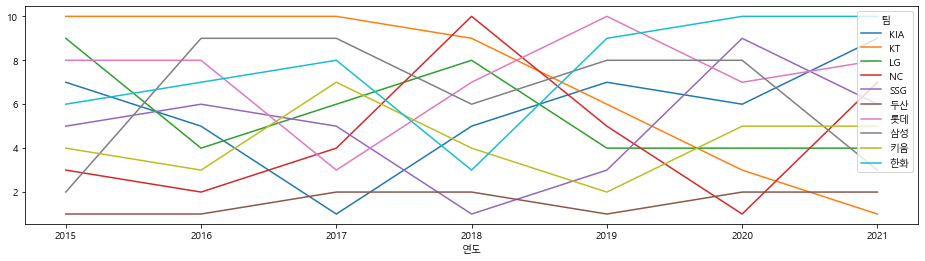

In [27]:
annual_rank.plot(figsize=(16, 4))

순위별로 팀명 정리

In [28]:
yearly_baseball_rank = baseball_df.pivot(index="연도", columns="순위", values="팀")
yearly_baseball_rank

순위,1,2,3,4,5,6,7,8,9,10
연도,,,,,,,,,,
2015,두산,삼성,NC,키움,SSG,한화,KIA,롯데,LG,KT
2016,두산,NC,키움,LG,KIA,SSG,한화,롯데,삼성,KT
2017,KIA,두산,롯데,NC,SSG,LG,키움,한화,삼성,KT
2018,SSG,두산,한화,키움,KIA,삼성,롯데,LG,KT,NC
2019,두산,키움,SSG,LG,NC,KT,KIA,삼성,한화,롯데
2020,NC,두산,KT,LG,키움,KIA,롯데,삼성,SSG,한화
2021,KT,두산,삼성,LG,키움,SSG,NC,롯데,KIA,한화


2015-2021 시즌 사이에 3 위 이내에 가장 많이 들어간 팀 순위

In [29]:
count = dict()
for teams in yearly_baseball_rank.loc[:, :3].values:
    for team in teams:
        if team in count:
            count[team] += 1
        else:
            count[team] = 1      

sorted(count.items(), key=lambda kv: kv[1], reverse=True)

[('두산', 7),
 ('NC', 3),
 ('삼성', 2),
 ('키움', 2),
 ('SSG', 2),
 ('KT', 2),
 ('KIA', 1),
 ('롯데', 1),
 ('한화', 1)]

## DataFrame을 pdf 로 저장

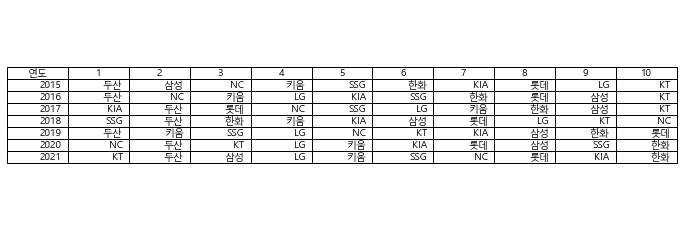

In [30]:
yearly_baseball_rank.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=yearly_baseball_rank.values, colLabels=yearly_baseball_rank.columns, loc='center')

pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

### SMTP mail sender 를 이용하여 첨부 파일로 발송

In [32]:
from email_sender import send_email

subject = '연도별 우승팀 현황'
body = '첨부된 파일을 확인해 주세요.\n다음 주에 식사 같이 하십시다.'
files = list()
files.append('foo.pdf')

send_email(subject, body, files)

성공적으로 메일 발송


<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 30. Capstone Project 2 - 주식/코인 가격 분석

In [1]:
# !pip install pandas-datareader
# !pip install finance-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data_reader
import FinanceDataReader as fdr
import datetime

## 삼성전자 주식 가격

In [3]:
SAMSUNG = data_reader.DataReader("005930.KS", data_source="yahoo")
SAMSUNG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-02,49340.0,48600.0,49200.0,49000.0,7777450.0,42311.839844
2017-08-03,49000.0,47120.0,49000.0,47780.0,15540800.0,41258.355469
2017-08-04,48180.0,47500.0,48160.0,47700.0,8359200.0,41189.289062
2017-08-07,48080.0,47440.0,47500.0,47580.0,7218250.0,41085.664062
2017-08-08,48260.0,47480.0,47980.0,47720.0,7979600.0,41206.550781


In [4]:
SAMSUNG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-26,61900.0,60800.0,60800.0,61700.0,6597211.0,61700.0
2022-07-27,61900.0,61200.0,61300.0,61800.0,7320997.0,61800.0
2022-07-28,62600.0,61600.0,62300.0,61900.0,10745302.0,61900.0
2022-07-29,62600.0,61300.0,62400.0,61400.0,15093120.0,61400.0
2022-08-01,61700.0,60300.0,61000.0,61300.0,13097910.0,61300.0


<AxesSubplot:xlabel='Date'>

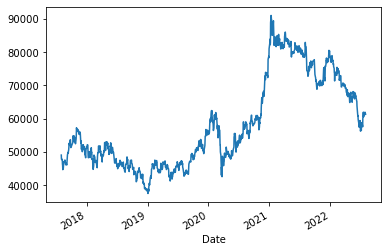

In [5]:
SAMSUNG['Close'].plot()

In [6]:
SAMSUNG.to_csv("SAMSUNG.csv")

## 일반 함수화

In [7]:
def get_stock_price(country, ticker):
    if country == "KR":
        df = data_reader.DataReader(ticker + ".KS", data_source="yahoo")
    elif country == "US":
        df = data_reader.DataReader(ticker, data_source="yahoo")
    return df

In [8]:
df = get_stock_price("US", "TSLA")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-01,64.889999,63.226002,64.599998,63.914001,41515500.0,63.914001
2017-08-02,65.424004,62.243999,63.787998,65.178001,65457500.0,65.178001
2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999
2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004
2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997


<AxesSubplot:xlabel='Date'>

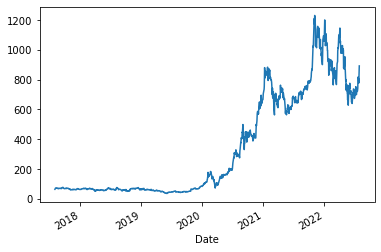

In [9]:
df['Close'].plot()

In [10]:
df = get_stock_price("KR", "005490") #포항제철
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-02,334000.0,327500.0,334000.0,330000.0,147227.0,271240.96875
2017-08-03,332500.0,321500.0,328500.0,330000.0,202772.0,271240.96875
2017-08-04,335000.0,328000.0,328000.0,334000.0,156475.0,274528.71875
2017-08-07,342500.0,332000.0,335000.0,342000.0,216897.0,281104.25000
2017-08-08,348000.0,336000.0,343000.0,337500.0,234928.0,277405.53125


## 여러 주식 종목의 가격 비교

In [11]:
tesla = get_stock_price("US", "TSLA")
ford = get_stock_price("US", "FORD")
apple = get_stock_price("US", "AAPL")
google = get_stock_price("US", "GOOGL")
sec = get_stock_price("KR", "005930")

In [12]:
start = datetime.datetime(2017, 8, 1)

bit = fdr.DataReader("BTC/USD", data_source="yahoo", start=start)
bit

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-08-01,2747.0,2883.3,2946.0,2659.6,123170.0,-0.0473
2017-08-02,2720.5,2747.0,2773.8,2668.9,81820.0,-0.0096
2017-08-03,2810.0,2720.5,2822.9,2717.6,68100.0,0.0329
2017-08-04,2878.5,2810.0,2892.7,2779.5,68760.0,0.0244
2017-08-05,3262.8,2878.5,3344.0,2875.9,159400.0,0.1335
...,...,...,...,...,...,...
2022-07-28,23850.0,22957.7,24190.5,22611.6,268320.0,0.0388
2022-07-29,23774.3,23850.2,24340.0,23451.4,221660.0,-0.0032
2022-07-30,23634.2,23774.2,24605.3,23521.8,168720.0,-0.0059


### Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [13]:
tesla['normed Close'] = tesla['Close']/tesla['Close'][0]
ford['normed Close'] = ford['Close']/ford['Close'][0]
apple['normed Close'] = apple['Close']/apple['Close'][0]
google['normed Close'] = google['Close']/google['Close'][0]
sec['normed Close'] = sec['Close']/sec['Close'][0]
bit['normed Close'] = bit['Close']/bit['Close'][0]

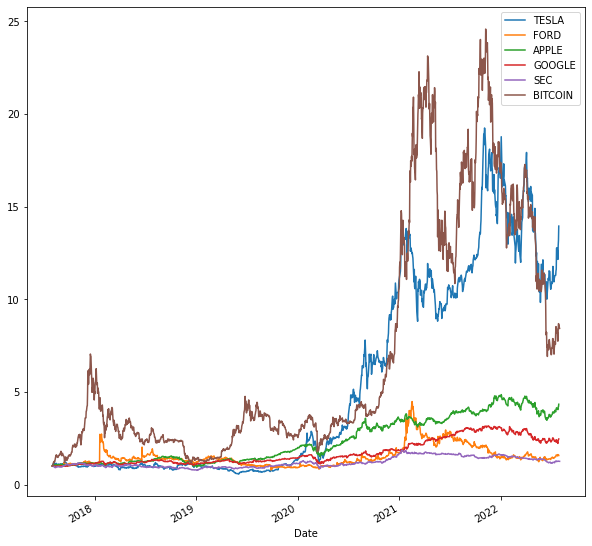

In [14]:
plt.figure(figsize=(10, 10))
tesla['normed Close'].plot(label='TESLA')
ford['normed Close'].plot(label='FORD')
apple['normed Close'].plot(label='APPLE')
google['normed Close'].plot(label='GOOGLE')
sec['normed Close'].plot(label='SEC')
bit['normed Close'].plot(label='BITCOIN')
plt.legend()

<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 31. Argument Parse

- sys.argv 를 어떻게 파싱할지 파악  

- 도움말과 사용법 메시지를 자동 생성하고, 사용자가 프로그램에 잘못된 인자를 줄 때 에러를 발생시킵니다.  


- 첫 번째 단계 : ArgumentParser 객체를 생성

- 인자 추가 : add_argument method  

- parse_known_args : 명령행 인자 중 일부만 파싱하고 나머지 인자를 다른 스크립트 나 프로그램에 전달

In [1]:
%%writefile argument_parse.py
import sys
import argparse

def _parse_arguments(argv):
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--from_date",
        help="starting date",  # python boilerplate.py -h/--help
        type=str,
        default="2020.01.01"
    )
    parser.add_argument(
        "--to_date",
        help="end date",
        type=str,
        default="2020.12.31"
    )

    return parser.parse_known_args(argv)

def hello():
    print('Hello world to Python programming')

if __name__ == '__main__':
#     print(sys.argv)
#     print(sys.argv[1:])
    
    args = _parse_arguments(sys.argv[1:])[0]
    print(args)
    print(args.from_date, args.to_date)
    
    hello()

Writing argument_parse.py


In [2]:
%run argument_parse.py --from_date 2021.03.01 --to_date 2021.03.31

Namespace(from_date='2021.03.01', to_date='2021.03.31')
2021.03.01 2021.03.31
Hello world to Python programming


In [3]:
%run argument_parse.py --help

usage: argument_parse.py [-h] [--from_date FROM_DATE] [--to_date TO_DATE]

optional arguments:
  -h, --help            show this help message and exit
  --from_date FROM_DATE
                        starting date
  --to_date TO_DATE     end date


<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 33. Tkinter

- Tkinter는 Tcl/Tk에 대한 파이썬 Wrapper로서 Tcl/Tk를 파이썬에 사용할 수 있도록 한 Lightweight GUI 모듈  

- Tcl은 Tool Command Language의 약자로서 일종의 프로그래밍 언어이며, Tk는 크로스 플랫폼에 사용되는 일종의 GUI 툴킷이다.   

- Tkinter는 타 GUI 프레임워크나 툴킷에 비해 지원되는 위젯들이 부족하고 UI도 그렇게 예쁘지 않다는 단점이 있지만, Python 설치시 기본적으로 내장되어 있는 파이썬 표준 라이브러리이기 때문에 쉽고 간단한 GUI 프로그램을 만들 때 활용될 수 있다.

## Basic Button

- Button 생성 ```btn=Button(win)```
- Button 크기 ```btn.config(width=20, height=20)```
- Button 내용 ```btn.config(text="버튼")```
- Button 기능 ```btn.config(command=alert)```

## Label
- Label 생성 ```lab = Label(win)```
- Label 내용 ```lab.config(text="내용")```
- Label 이미지 ```lab.cofig(image=img)```

### `pack()` method - widget을 parent widget 에 배치

In [1]:
from tkinter import *

root = Tk()
root.geometry("500x200")
root.title("Main Window")
root.option_add("*Font", "맑은고딕 20")

def myClick():
    myLabel = Label(root, text="Look! I clicked a Button!")
    myLabel.pack()
    
#creating a Label Widget
myLabel1 = Label(root, text="Hello World")
myLabel2 = Label(root, text="제 이름은 오영제 입니다.")
myLabel1.pack()
myLabel2.pack()

myButton = Button(root, text="click me", command=myClick)

myButton.pack()

root.mainloop()

### `grid()` method - widget 을 table 형태로 배치

In [2]:
from tkinter import *

root = Tk()
root.geometry("800x200")
root.title("Main Window")
root.option_add("*Font", "맑은고딕 20")

def myClick():
    myLabel = Label(root, text="Look! I clicked a Button!")
    myLabel.grid(row=3, column=2)

#creating a Label Widget
myLabel1 = Label(root, text="Hello World")
myLabel2 = Label(root, text="제 이름은 오영제 입니다.")

myButton = Button(root, text="click me", command=myClick)

myLabel1.grid(row=0, column=0)
myLabel2.grid(row=1, column=1)

myButton.grid(row=2, column=1)

root.mainloop()

- 현재 시각 display

In [3]:
from tkinter import *
import time

root = Tk()
root.geometry("800x200")
root.title("Main Window")
root.option_add("*Font", "맑은고딕 20")

def myClick():
    myLabel = Label(root, text=time.strftime('%Y-%m-%d-%H:%M:%S %A', time.localtime(time.time())))
    myLabel.pack()

myButton = Button(root, text="현재시각", command=myClick)
myButton.pack()

root.mainloop()

## data input

- entry 생성 ```e = Entry(win)```
- 초기값 ```e.insert(index, "default 값")```
- entry 의 현재 값 ```e.get()```

In [4]:
root = Tk()
root.geometry("800x200")
root.title("Main Window")
root.option_add("*Font", "맑은고딕 20")

e = Entry(root, width=50, borderwidth=5)
e.pack()
e.insert(0, "이름을 입력하세요")

def buttonClick():
    txtLabel = Label(root, text="Hello : " + e.get())
    txtLabel.pack()
    
btton = Button(root, text="click me", command=buttonClick)
btton.pack()

root.mainloop()

## Hello World - OOP 방식

In [5]:
import tkinter as tk

class Application(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.pack()
        self.create_wideget()
        
    def create_wideget(self):
        self.hi_there = tk.Button(self)
        self.hi_there["text"] = "Hello World\n(click me)"
        self.hi_there["command"] = self.say_hi
        self.hi_there.pack(side="top")
        
        self.quit = tk.Button(self, text="QUIT", fg="red",
                              command=self.master.destroy)
        
        self.quit.pack(side="bottom")
        
    def say_hi(self):
        print("hi there everyone")
        
root = tk.Tk()
root.geometry("800x200")
root.title("Main Window")
root.option_add("*Font", "맑은고딕 20")

app = Application(master=root)
app.mainloop()

## 연습문제

- 로또 당첨 번호를 web scraping 하여 display 하는 widget 작성



- BITCOIN 의 현재 시세를 web scraping 하여 10 초 간견으로 update 하는 widget 작성

<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 40. Multi-threading and Multi-processing

## Multi-threading vs. Multi-processing

<div style="display:flex;">
<div><img src="multithread.png" width="200" /></div>
<div>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div><img src="multiprocessing.jpg" width="500" /></div>
</div>

## When to use what ?
- program이 network bound 인 경우 --> multi-threading 사용   
    ex) web scraping 중 cpu 가 idle 상태  
    
    
- program이 cpu bound 인 경우 --> multi-processing 사용

In [1]:
import time
import threading

def calc_square(num_list):
    print('제곱 계산')
    for n in num_list:
        time.sleep(0.2)
        print(f'sqaure: {n*n}')
        
def calc_cube(num_list):
    print('세제곱 계산')
    for n in num_list:
        time.sleep(0.2)
        print(f'cube: {n*n*n}')

arr = [5, 10, 15, 20]

### serial processing

In [2]:
s = time.time()

result1 = calc_square(arr)
result2 = calc_cube(arr)

print()
print("작업 시간 ", time.time() - s)
print(result1, result2)

제곱 계산
sqaure: 25
sqaure: 100
sqaure: 225
sqaure: 400
세제곱 계산
cube: 125
cube: 1000
cube: 3375
cube: 8000

작업 시간  1.6800768375396729
None None


### Multi-threading

- target : callable object. 
- args : target에 전달할 parameters  
- join() : thread가 종료될 때까지 작업이 block

In [3]:
t1 = threading.Thread(target=calc_square, args=(arr,))
t2 = threading.Thread(target=calc_cube, args=(arr,))

s = time.time()

t1.start()
t2.start()

t1.join()
t2.join()

print()
print("작업 시간 ", time.time() - s)

제곱 계산세제곱 계산

sqaure: 25
cube: 125
sqaure: 100
cube: 1000
sqaure: 225
cube: 3375
cube: 8000sqaure: 400


작업 시간  0.8418560028076172


### Multi-processing

In [4]:
import multiprocessing as mp

mp.cpu_count()

16

In [5]:
p1 = mp.Process(target=calc_square, args=(arr,))
p2 = mp.Process(target=calc_cube, args=(arr,))

s = time.time()

p1.start()
p2.start()

p1.join()
p2.join()

print()
print("작업 시간 ", time.time() - s)


작업 시간  0.08496665954589844


<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>

# 51. GIF animation 만들기

!pip install imageio  

In [5]:
import os
from IPython import display

directory = 'images/'
file_type = 'png'
save_gif_name = 'Animation'
speed_sec = {'duration': .5}

### animation file 작성 방법 1 - mimsave()

- imageio.mimsave : Write multiple images to the specified file.

In [2]:
images = []
for file_name in os.listdir(directory):
    if file_name.startswith('image_at_epoch_'):
        file_path = os.path.join(directory, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(f'{directory}/{save_gif_name}.gif', images, **speed_sec)

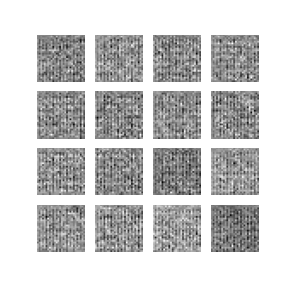

In [3]:
display.Image(filename=f'{directory}/{save_gif_name}.gif')

### animaton file 작성 방법 2 - imageio.get_writer() 이용

In [6]:
import imageio
import glob

save_gif_name2 = directory + 'Animation2.gif'

with imageio.get_writer(save_gif_name2, mode='I') as writer:
    filenames = glob.glob('images/image_at_epoch_*.png')
    filenames = sorted(filenames)
    
    for i,filename in enumerate(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)

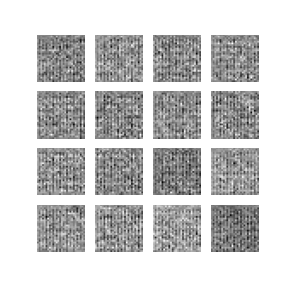

In [7]:
display.Image(filename=f'{save_gif_name2}')

<div>











</div>

&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>
&nbsp;<br>